This notebook is primarily intended for developers, but may be used by anyone who would like to explore solutions and is comfortable with looking at python code.
The intent is both to make it easy to find the solutions and what is in them, and also, by looking at the code behind the top level Solution and SolutionExplorer
classes, to understand how the code behind it works.


# Setup

In order to run this notebook, you need Jupyter Notebook or Jupyter Lab set up with the dependencies given in devenv.yml.   This notebook runs the PD solutions from the code locally on this machine: it does not require any connections to databases or servers.

This notebook must be executed from the main directory of this repo, since much of the code makes assumptions about relative directory paths.


In [1]:
import model.solution
import ui.explorer
from bokeh.plotting import output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
# This is optional, but if you find you are seeing SettingWithCopyWarnings from pandas, this will turn them into errors
# so that you can figure out where they are happening.

import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')

# Solutions

The solutions are listed in the directory 'solution'.   Here's also a convenience functoin to print them out for you.

In [2]:
print(model.solution.Solution.solution_list())

['afforestation', 'airplanes', 'altcement', 'bamboo', 'bikeinfrastructure', 'biochar', 'biogas', 'biogas_small', 'biomass', 'bioplastic', 'bottomtrawling', 'buildingautomation', 'carpooling', 'composting', 'concentratedsolar', 'conservationagriculture', 'coolroofs', 'districtheating', 'electricbikes', 'electricvehicles', 'farmlandrestoration', 'forestprotection', 'geothermal', 'grasslandprotection', 'greenroofs', 'heatpumps', 'highspeedrail', 'hybridcars', 'improvedcookstoves', 'improvedrice', 'indigenouspeoplesland', 'instreamhydro', 'insulation', 'irrigationefficiency', 'landfillmethane', 'leds_commercial', 'leds_residential', 'managedgrazing', 'mangroverestoration', 'masstransit', 'microwind', 'multistrataagroforestry', 'nuclear', 'nutrientmanagement', 'offshorewind', 'onshorewind', 'peatlands', 'perennialbioenergy', 'recycledpaper', 'refrigerants', 'regenerativeagriculture', 'riceintensification', 'ships', 'silvopasture', 'smartglass', 'smartthermostats', 'solarhotwater', 'solarpvr

The Solution class loads a solution and all of it's scenarios.  Doing this requires a bunch of computation and may take awhile.

Also, some solutions may not work if they are not complete, or if Solution hasn't been extended yet to handle them correctly.

In [3]:

soln = model.solution.Solution('geothermal')

In [4]:
soln.scenario_indexes()

[(0, 'PDS-3p2050-Drawdown2020'),
 (1, 'PDS-3p2050-Plausible2020'),
 (2, 'PDS-6p2050-Optimum2020')]

In [5]:
# To get some data about the solution, call one of the methods.  It returns a dataframe with the data for all scenarios and regions, etc.
# Note that the scenario is indexed by integer (see the list above) rather than solution name (integers are a lot easier to type)
co2 = soln.co2_reduction()
co2

World  OECD90  Eastern Europe  Asia (Sans Japan)  Middle East and Africa  Latin America  China  India   EU  USA
Scenario Year                                                                                                                       
0        2021    48.323600     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2022    63.340683     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2023    79.814886     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2024    97.615718     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2025   116.695710     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
...                    ...     ...             ...                ...                     ...            ...    ...    ...  ...  ...
2        2046  1315.480015     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2047  1376.384381     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2048  1437.060853     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2049  1499.086293     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
         2050  1563.970420     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0

[90 rows x 10 columns]

<AxesSubplot:xlabel='Scenario,Year'>

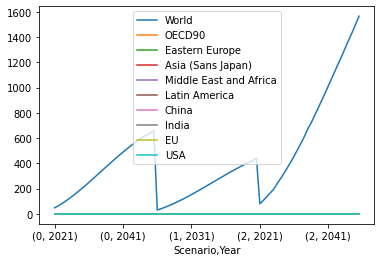

In [6]:
# This is a regular pandas dataframe, and you can do with it whatever you would like.
# Let's try plotting it:
co2.plot()

<AxesSubplot:xlabel='Year'>

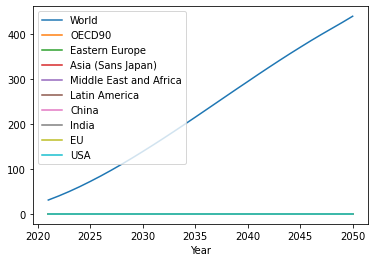

In [7]:
# That didn't quite work as expected, did it.  That is because the scenario got flattened in with the year.
# To get data for a specific scenario, use the syntax    frame.loc[i], where the index is given by the
# scenario_indices method (see above)
co2.loc[1].plot()

# Graphical Explorer

The Solution Explorer makes it easy to look at the solution data graphically.  

TODO: And one day it will do more things, like let you restrict by scenario, region, etc., dynamically

In [8]:
explorer = ui.explorer.SolutionExplorer(soln)

In [9]:
# the explorer show* methods automatically omit columns that are all zero (such as regions that have no data).
# you can override this by passing the argument keep_zeros=True

explorer.show_co2_reduction()

# Comparing Data to Excel

The python module `tools.excel_tools` contains some tools to make it easier to compare solution data with data in Excel,
or with the saved test data for a solution.   Let's see how we can use this with our geothermal solution.

In [10]:
import tools.excel_tools as xlt

In [12]:
soln = model.solution.Solution('geothermal')
soln.scenario_indexes()

[(0, 'PDS-3p2050-Drawdown2020'),
 (1, 'PDS-3p2050-Plausible2020'),
 (2, 'PDS-6p2050-Optimum2020')]

In [18]:
co2_optimum = soln.co2_reduction().loc[2]  # loc[2] --> scenario #2

In [22]:
# Each solution has an archive holding the spreadsheet data that was used to generate the modl.
# We can access that information with the `solution_expected_results` function.
# You have to provide the scenario name as a string, and the name of the tab you want to retrieve
# You get back a dataframe with the entire tab results on it.

co2_tab = xlt.solution_expected_results('geothermal','PDS-6p2050-Optimum2020','CO2 Calcs')
co2_tab.shape

(390, 67)

In [23]:
# We think that the CO2 reduction data is in range B16:K45, so let's pull that out
# Notice we can do this using the Excel notation --- no more converting column labels to offsets in your head!

co2_from_testdata = xlt.excel_range_from_df(co2_tab, "B16:K45")

In [24]:
co2_from_testdata

,1,2,3,4,5,6,7,8,9,10
15,62.436909,0,0,0,0,0,0,0,0,0
16,83.583791,0,0,0,0,0,0,0,0,0
17,106.705200,0,0,0,0,0,0,0,0,0
18,131.542163,0,0,0,0,0,0,0,0,0
19,155.137365,0,0,0,0,0,0,0,0,0
20,191.698601,0,0,0,0,0,0,0,0,0
21,225.225785,0,0,0,0,0,0,0,0,0
22,261.025569,0,0,0,0,0,0,0,0,0
23,299.026384,0,0,0,0,0,0,0,0,0
24,338.392736,0,0,0,0,0,0,0,0,0


In [26]:
# Is it the same?  Let's check.   The function `df_differ` will check "nicely", ignoring small numerical errors and common 
# gotcha's like empty cells vs. empty strings.

xlt.df_differ( co2_optimum, co2_from_testdata )

[(0, 0, 80.07922454117701, 62.4369091413878),
 (1, 0, 106.44038310498468, 83.58379102167441),
 (2, 0, 134.93619351520044, 106.70519972741415),
 (3, 0, 165.20122957510506, 131.54216311970816),
 (4, 0, 193.64589118017082, 155.13736468571426),
 (5, 0, 237.51844793442956, 191.6986014770388),
 (6, 0, 277.21135247014024, 225.22578495054307),
 (7, 0, 319.1662532462221, 261.0255685721747),
 (8, 0, 363.25059251672235, 299.02638420505514),
 (9, 0, 408.5261547220571, 338.3927363496512),
 (10, 0, 457.2866139488209, 381.3448389570462),
 (11, 0, 506.98170806321684, 425.51934180239886),
 (12, 0, 558.2926419092752, 471.6086041114844),
 (13, 0, 611.0941113822771, 519.5410577474237),
 (14, 0, 672.4806035583042, 575.5241440946736),
 (15, 0, 720.6444027776007, 620.6492664523482),
 (16, 0, 777.1489225157911, 673.6818852475753),
 (17, 0, 834.644200837035, 728.27142282214),
 (18, 0, 892.9799614535691, 784.3463110391639),
 (19, 0, 951.6254178057429, 841.855615062804),
 (20, 0, 1011.7846952398154, 900.66586685

In [ ]:
# Right now it isn't!  xlt.df_differ returns a list of tuples, one for each position where the data differed.
# Here we can see that the entire first column differred, and it looks like there might be an indexing error.
# Stay tuned, more to come!